In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
ray 1.13.0 requires click<=8.0.4,>=7.0, but you have click 8.1.3 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.


In [2]:
!rm -rf Naruto_or_Not

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term,max_images=30):
    results = L(ddg_images(term,max_results=max_images))
    return results.itemgot('image')


In [4]:
images = search_images("Naruto")

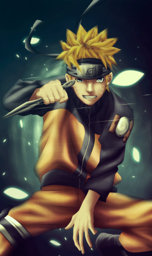

In [5]:
from fastdownload import download_url
download_url(images[0],'Naruto.jpg')

from fastai.vision.all import *

im = Image.open('Naruto.jpg')
im.to_thumb(256,256)

In [6]:
from time import sleep


search_terms = ['Sasuke','Naruto','Pikachu','Dog','Pig']
path = Path('Naruto_or_Not')
for character in search_terms:
    dest = (path/character)
    print('Downloading images for ',character)
    dest.mkdir(parents=True,exist_ok=True)
    download_images(urls=search_images(character,max_images=200),dest=dest)
    sleep(10)
    resize_images(path=dest,size=400,dest=dest)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [7]:
failed =verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

80

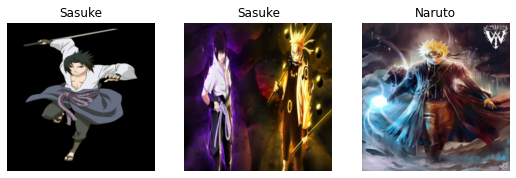

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter( valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256, method='squish')],
        ).dataloaders(path,bs=32)
dls.show_batch(max_n=3)

In [9]:
model = vision_learner(dls,resnet18, metrics=error_rate)
model.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.551709,0.465837,0.184971,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.456102,0.365737,0.127168,00:56
1,0.288567,0.421296,0.104046,00:55
2,0.201011,0.408413,0.127168,00:57
3,0.144465,0.386393,0.121387,00:56
4,0.100081,0.370831,0.104046,00:53
5,0.071122,0.374349,0.104046,00:53
6,0.056438,0.373709,0.098266,00:54


In [10]:
is_naruto,_,probs = model.predict(PILImage.create('Naruto.jpg'))
print(f"This is a: {is_naruto}.")
print(f"Probability it's a Naruto: {probs[0]}")

This is a: Naruto.
Probability it's a Naruto: 2.1282364315311497e-08


In [11]:
!rm -rf new

In [12]:
res= search_images("Sasuke",max_images=100)[31:46]
res

(#15) ['https://wallpapercave.com/wp/wp2491428.jpg','http://myanimeshelf.com/upload/dynamic/2011-01/13/naruto_1845492.jpg','https://images4.fanpop.com/image/photos/18800000/Sasuke-Uchiha-benandgwen2009-18851047-700-989.jpg','https://vignette.wikia.nocookie.net/ninjutsu-rpg/images/4/48/Sasuke-Uchiha-20.png/revision/latest?cb=20140519171946','https://preview.redd.it/q86y3snw51c31.jpg?auto=webp&s=764d59b67ff011f772b258ff1aa01c608165754c','https://www.pixel-creation.com/wp-content/uploads/uzumaki-naruto-uchiha-sasuke-screaming-splitting-rinnegan-800x800.jpg','https://yt3.ggpht.com/a/AATXAJxEG1vWo38Z7Qsjj4pBzxKjxV01JZ3_TjEFQQ=s900-c-k-c0xffffffff-no-rj-mo','https://www.clearwallpaper.com/wp-content/uploads/2020/12/sasuke-uchiha-wallpaper-0130.jpg','https://img.webnovel.com/bookcover/16847540406613205/600/600.jpg?coverUpdateTime=1588676348600','https://static3.cbrimages.com/wordpress/wp-content/uploads/2020/12/sasuke.jpg'...]

In [13]:
dest2=(Path("new"))
dest2.mkdir(parents=True,exist_ok=True)
download_images(urls=res,dest=dest2)

In [14]:
import glob

This is not Naruto


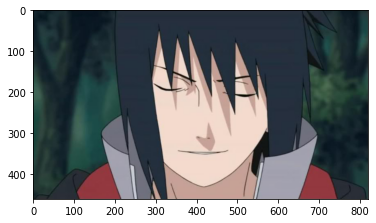

This is not Naruto


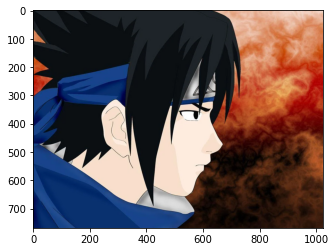

This is not Naruto


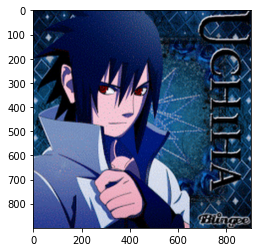

This is not Naruto


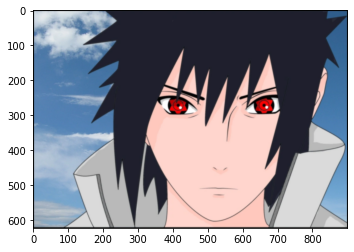

This is not Naruto


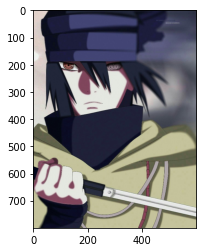

This is not Naruto


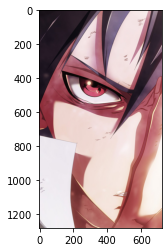

This is not Naruto


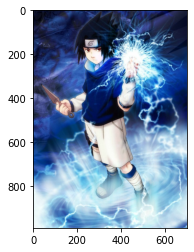

This is not Naruto


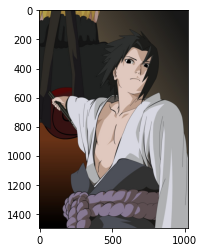

This is not Naruto


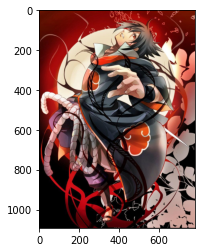

This is Naruto.


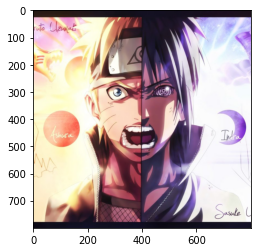

This is not Naruto


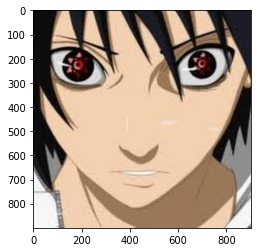

This is not Naruto


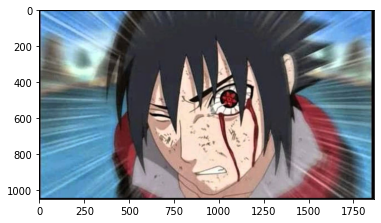

This is not Naruto


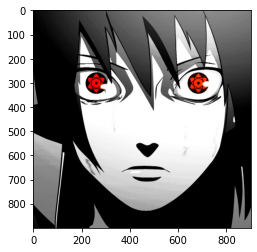

In [15]:
import matplotlib.pyplot as plt
for naruto in glob.glob('new/*'):
    try:
        is_naruto,_,probs = model.predict(PILImage.create(naruto))
        if(is_naruto!='Naruto'):
            print(f"This is not Naruto")
        else:
            print(f"This is Naruto.")
        im = Image.open(naruto)
        plt.imshow(im)
        plt.show()
        
    except:
        pass

In [16]:
!pip install matplotlib